In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
cd /content/drive/MyDrive/ominiv.github.io/ML.assets/

/content/drive/MyDrive/ominiv.github.io/ML.assets


# [실습] Kmeans Clustering
- 평균거리 중심으로 중심을 이동하면서 군집화
- 군집내 데이터가 원형으로 흩어진 경우 매우 효과적

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris  = load_iris()
irisDF = pd.DataFrame(data = iris.data,columns = iris.feature_names)
irisDF.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=1000,random_state=0)
kmeans.fit(irisDF)
print('Cluster : \n',kmeans.labels_);print('='*50)
irisDF['target'] =iris.target
irisDF['cluster'] = kmeans.labels_
print(irisDF.groupby(['target','cluster'])['sepal length (cm)'].count());print('='*50)
print(irisDF.head(3))

Cluster : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
target  cluster
0       0          50
1       1           2
        2          48
2       1          36
        2          14
Name: sepal length (cm), dtype: int64
   sepal length (cm)  sepal width (cm)  ...  target  cluster
0                5.1               3.5  ...       0        0
1                4.9               3.0  ...       0        0
2                4.7               3.2  ...       0        0

[3 rows x 6 columns]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
irisDF['pc1'] = pca_transformed[:,0]
irisDF['pc2'] = pca_transformed[:,1]
irisDF.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pc1,pc2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949


Text(0.5, 1.0, 'Kmeans-Cluster')

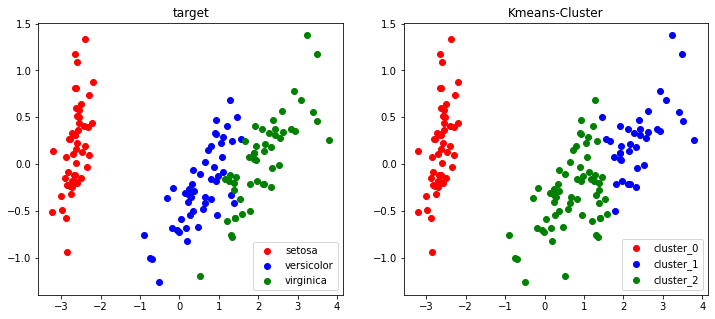

In [ ]:
fig, axs = plt.subplots(figsize=(12,5),ncols=2)
colors =['red', 'blue', 'green']
for i, color in enumerate(colors):
    axs[0].scatter(x=irisDF[irisDF['target']==i]['pc1'],y=irisDF[irisDF['target']==i]['pc2'],c=color,label =iris.target_names[i])
axs[0].legend()
axs[0].set_title('target')
for i, color in enumerate(colors):
    axs[1].scatter(x=irisDF[irisDF['cluster']==i]['pc1'],y=irisDF[irisDF['cluster']==i]['pc2'],c=color,label = 'cluster_'+str(i))
axs[1].legend()
axs[1].set_title('Kmeans-Cluster')

# [실습] 군집화 알고리즘 테스트를 위한 데이터 생성
- `make_blobs`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd

# 200 recode / 2 features / 3 centers
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape, y.shape)
print(np.unique(y,return_counts=True))

DF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
DF['target']=y
DF.head()

(200, 2) (200,)
(array([0, 1, 2]), array([67, 67, 66]))


,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels =kmeans.fit_predict(X)
DF['kmeans_label'] = cluster_labels

Text(0.5, 1.0, 'kmeans clustering')

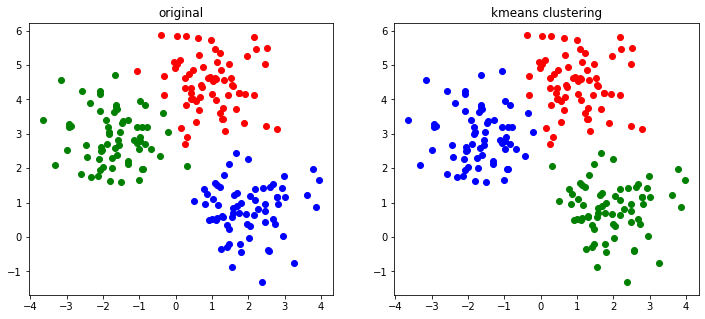

In [ ]:
colors =['red', 'blue', 'green']
fig, axs = plt.subplots(figsize=(12,5),ncols=2)
for i , color in enumerate(colors):
    axs[0].scatter(x=DF[DF['target']==i]['ftr1'],y=DF[DF['target']==i]['ftr2'],c=color)
axs[0].set_title('original')
for i , color in enumerate(colors):
    axs[1].scatter(x=DF[DF['kmeans_label']==i]['ftr1'],y=DF[DF['kmeans_label']==i]['ftr2'],c=color)
axs[1].set_title('kmeans clustering')

- make_blobs의 cluster_std 파라미터로 데이터 분포도를 조절한다. 
- cluster_std가 작을 수록 군집중심에 데이터가 모여있고, 클수록 데이터가 퍼져있다.

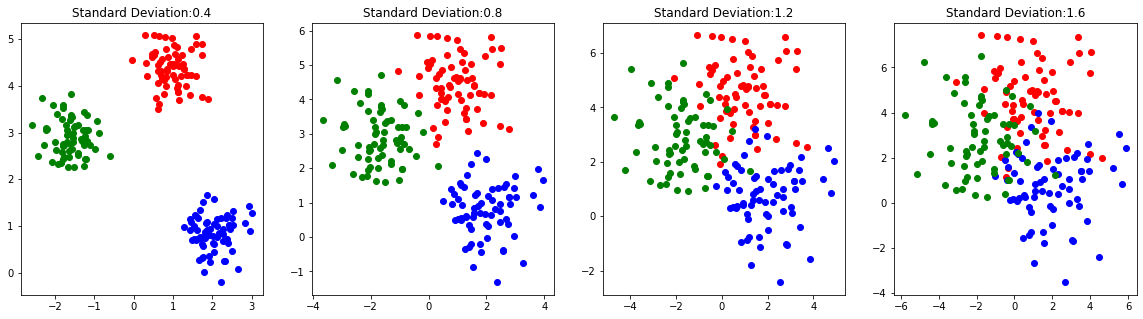

In [ ]:

colors =['red', 'blue', 'green']
std_list =[0.4,0.8,1.2,1.6]
fig, axs = plt.subplots(figsize=(20,5),ncols=4)
for j in range(4):
    X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=std_list[j],random_state=0)
    DF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
    DF['target'] = y
    for i , color in enumerate(colors):
        axs[j].scatter(x=DF[DF['target']==i]['ftr1'],y=DF[DF['target']==i]['ftr2'],c=color)
    axs[j].set_title('Standard Deviation:'+str(std_list[j]))


# [실습] MeanShift
- MeanShift는 중심을 **데이터가 모여있는 밀도가 가장 높은 곳**으로 이동시킨다
- bandwidth를 높이면 cluster 수 적어짐

band width : 1.8158484154517098
cluster labels 유형 :  [0 1 2]
cluster labels 유형 :  [0 1 2]
cluster labels 유형 :  [0 1 2]
cluster labels 유형 :  [0 1 2 3 4 5]
cluster labels 유형 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


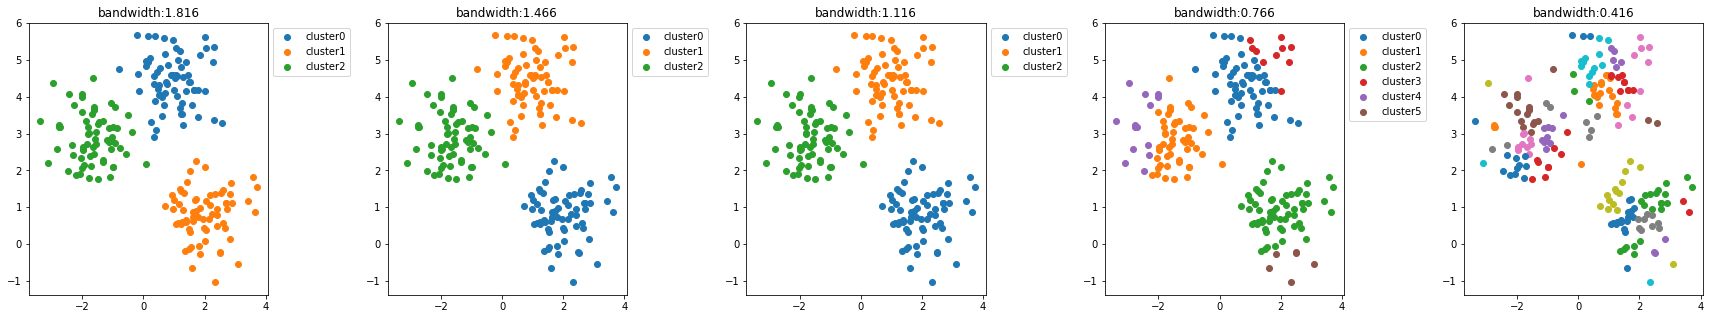

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth   
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples=200, n_features=2, centers=3,cluster_std=0.7,random_state=0)

# 최적 bandwidth 계산
bandwidth=estimate_bandwidth(X)
print('band width :',bandwidth)

fig, axs = plt.subplots(figsize=(30,5),ncols=5)
fig.subplots_adjust(wspace=0.5)
for j in range(5):    
    # 평균이동 군집화
    meanshift = MeanShift(bandwidth=bandwidth)
    cluster_labels = meanshift.fit_predict(X)
    print('cluster labels 유형 : ',np.unique(cluster_labels))

    DF = pd.DataFrame(data=X)
    DF['cluster'] = cluster_labels
    clusters = np.unique(cluster_labels)
    for i , cluster in enumerate(clusters):
        axs[j].scatter(x=DF[DF['cluster']==i][0],y=DF[DF['cluster']==i][1], label='cluster'+str(i))
    axs[j].set_title('bandwidth:'+ str(np.round(bandwidth,3)))
    if len(clusters)<=6 :
        axs[j].legend(bbox_to_anchor=(1, 1))
    bandwidth -=0.35
fig.savefig('Meanshift_plot.png')

# [실습] GMM
- 확률 기반 군집화
- GMM의 EM방식을 통한 모수 추정 군집화
- iris dataset의 경우 kmeans보다 GMM이 더 효과적임

In [17]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = load_iris()
DF = pd.DataFrame(data=iris.data, columns= iris.feature_names)
DF['target']= iris.target

gmm = GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

kmeans_cluster = KMeans(n_clusters=3,random_state=0).fit_predict(iris.data)

DF['gmm_cluster'] = gmm_cluster_labels
DF['kmeans_cluster'] = kmeans_cluster


In [20]:
print(DF.groupby(['target'])['gmm_cluster'].value_counts());print('='*50)
print(DF.groupby(['target'])['kmeans_cluster'].value_counts())

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64
target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


# [실습] Kmeans vs. GMM
- 치우쳐진 데이터의 경우 GMM이 훨씬더 효과적이다.

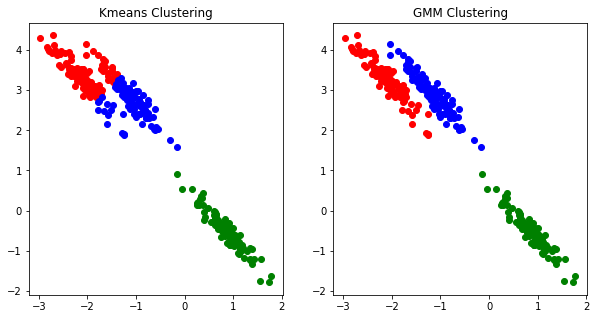

In [34]:
from sklearn.datasets import load_iris, make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X,y = make_blobs(n_samples=300, n_features=2,centers=3,cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.6,-0.6],[-0.4,0.8]]
X_aniso = np.dot(X,transformation)

DF = pd.DataFrame(data=X_aniso, columns=['component1','component2'])
DF['target']= y

kmeans_label = KMeans(n_clusters=3,random_state=0).fit_predict(X_aniso)
gmm_label = GaussianMixture(n_components=3,random_state=0).fit_predict(X_aniso)
DF['kmeans_label'] =kmeans_label
DF['gmm_label'] =gmm_label

colors=['red','green','blue']
fig, axs = plt.subplots(figsize=(10,5),ncols=2)
for target in np.unique(y):
    axs[0].scatter(x=DF[DF['kmeans_label']==target]['component1'], y=DF[DF['kmeans_label']==target]['component2'],c=colors[target])
axs[0].set_title('Kmeans Clustering')
for target in np.unique(y):
    axs[1].scatter(x=DF[DF['gmm_label']==target]['component1'], y=DF[DF['gmm_label']==target]['component2'],c=colors[target])
axs[1].set_title('GMM Clustering')

fig.savefig('Kmeans_VS_GMM.png')

# [실습] DBSCAN